In [33]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [34]:
!pip install --upgrade --no-cache-dir gdown
!gdown 13UXkURa_S_QaHNsBO0m1UzbrVH1cakJK

Downloading...
From: https://drive.google.com/uc?id=13UXkURa_S_QaHNsBO0m1UzbrVH1cakJK
To: /content/Life Expectancy Data.csv
100% 333k/333k [00:00<00:00, 112MB/s]


In [35]:
data = pd.read_csv('/content/Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [36]:
# first i see some column name with empty space i will fixed it to ease of use
data.columns = data.columns.str.strip()

In [37]:
# Size of the data
data.shape

(2938, 22)

In [38]:
# A Quick Information about the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [39]:
# Checking for Null Values
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [40]:
# check if duplicated in data
data.duplicated().any()

False

In [41]:
# see quick info of numeric values
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [42]:
# see quick info of category values
data.describe(include = object)

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [43]:
# spliting data to train and test
train, test =  train_test_split(data, test_size = 0.2, random_state = 83)

In [44]:
def fill_train_with_median():
    return train.fillna(train.median(numeric_only = True))

def fill_test_with_median():
    return test.fillna(test.median(numeric_only = True))

# Apply the function to data
train = fill_train_with_median()
test = fill_test_with_median()

In [45]:
train.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

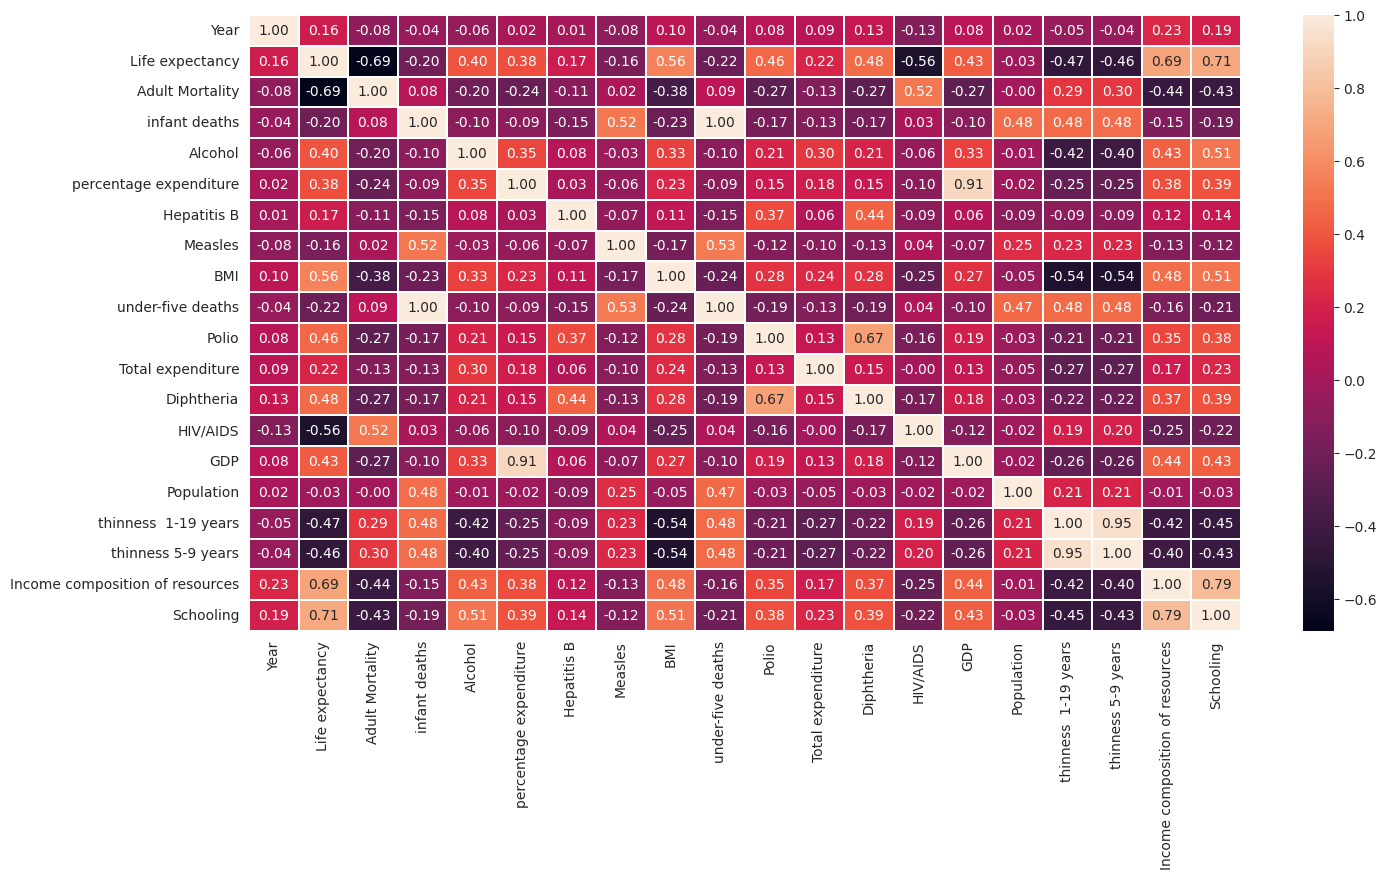

In [46]:
plt.figure(figsize = (16,8))
sns.heatmap(train.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

In [47]:
# create object from labelencoder
encoder = LabelEncoder()
for column in ["Country", "Status"]:
    train[column] = encoder.fit_transform(train[column])
    test[column] = encoder.fit_transform(test[column])

In [48]:
X_train, y_train = train.drop(["Life expectancy"], axis=1).values, train[["Life expectancy"]].values
X_test, y_test = test.drop(["Life expectancy"], axis=1).values, test[["Life expectancy"]].values

In [49]:
# Scaling train data using min max scaler
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [50]:
y_train

array([[74.6],
       [61. ],
       [73.5],
       ...,
       [83. ],
       [80. ],
       [71.7]])

In [51]:
tree_model = tree.DecisionTreeRegressor(random_state=83)

In [52]:
# Fit the regressor to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score


# Evaluate the model using metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 1.2568027210884352
Mean Squared Error (MSE): 4.606768707482994
R-squared (R²): 0.9462719119906475


In [54]:
np.random.seed(53)
random_row = np.random.choice(X_test.shape[0], size=10, replace=False)
test2 = X_test[random_row]
label_test2 = y_test[random_row]
y_hat2 = tree_model.predict(test2)
label_test2, y_hat2
# delta = ((label_test2-y_hat2)/label_test2)
# # delta = np.vstack(("% of errore", delta))
# print(delta, "\n")

# label_test2 , y_hat2 = arrays_with_names = np.vstack(("prediction", label_test2)), np.vstack(("label", y_hat2))
# array = np.hstack((label_test2 , y_hat2))
# print(array)

(array([[66.4],
        [71.5],
        [74.4],
        [65.1],
        [74.2],
        [72.5],
        [47.7],
        [71.5],
        [69.7],
        [62. ]]),
 array([66. , 71. , 74.6, 65.3, 74.5, 72.5, 52.1, 71.4, 73.6, 61.8]))